In [1]:
import scipy.stats
import numpy
import statistics
import random 
import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt

In [2]:
def FCFSR_Wsystem(N, servicerate_1, arrival_rate_1, servicerate_2, arrival_rate_2, gamma, termination, a, b, c, d):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    Total_1 = 0
    Total_2 = 0
    # Average queue 
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    
    Queue = 0 
    Queue_1 = 0 
    Queue_2 = 0 
    Q_num = 0
    Q_num_2 = 0
    Q_num_1 = 0
    Queue_name = []
    AreaQ = 0
    AreaQ_1 = 0
    AreaQ_2 = 0
    AreaP = 0
    AreaQ_rate = 0
    
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
        
    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0

    # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]
    
    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    Class_1 = []
    Class_2 = []
    Class_3 = []
    C_1 = []
    C_2 = []
    C_3 = []
    # Selection for clases NEDDDED TO CHANGE
    # Selection for clases
    for s in free_servers:
        if a*(servicerate_1[s])+ b <= servicerate_2[s] <= 2:
            Class_3.append(s)
            C_3.append(s)
        elif c*(servicerate_1[s])+ d >= servicerate_2[s] >= 0:
            Class_1.append(s)
            C_1.append(s)
        else:
            Class_2.append(s)
            C_2.append(s)

    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination: 
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event] 
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaQ_1 += Queue_1*(termination - TLast)
            AreaQ_2 += Queue_2*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaQ_1 += Queue_1*(TNOW - TLast)
            AreaQ_2 += Queue_2*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
        
            
        if Next_Event == "Arrival_1":
            event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            TotalP += 1
            Total +=1
            Total_1 +=1
    
            if Class_2 + Class_1 == []:
                Queue += 1
                Queue_1 += 1
                Q_num += 1
                Q_num_1 += 1
                Arrival_times[str(Q_num)+ "_1"] = TNOW
                Queue_name.append(str(Q_num)+ "_1")
                event_calendar["Departure_" + str(Q_num)+"_1"] = TNOW + random.expovariate(gamma)
                        
            elif Class_1 == [] and Class_2 !=[]:
                N_served +=1
                N_served_1 +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
           
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                        
            
            elif (Class_1 != [] and Class_2 != []) or (Class_1 != [] and Class_2 == [] ):
                N_served_1 +=1
                N_served +=1
                s =  random.choice(Class_1)
                free_servers.remove(s)
                Class_1.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_1[s] += event_calendar[s] - TNOW 
                else:
                    Total_Utilization[s] += termination - TNOW  
                    Utilization_1[s] += termination - TNOW
                 
                        
        elif Next_Event == "Arrival_2":
            event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            TotalP += 1
            Total +=1
            Total_2 +=1
            
            if Class_2 + Class_3 == []:
                Queue += 1
                Q_num += 1
                Q_num_2 += 1
                Queue_2 += 1
                Arrival_times[str(Q_num)+ "_2"] = TNOW
                Queue_name.append(str(Q_num)+ "_2")
                event_calendar["Departure_" + str(Q_num)+"_2"] = TNOW + random.expovariate(gamma)
            
            elif Class_3 == [] and Class_2 !=[]:
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_2)
                free_servers.remove(s)
                Class_2.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])

                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += termination - TNOW
                        
            elif (Class_2 != [] and Class_3 != []) or (Class_3 != [] and Class_2== [] ):
                N_served_2 +=1
                N_served +=1
                s =  random.choice(Class_3)
                free_servers.remove(s)
                Class_3.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                 # Only schedule the next service if TNOW < termination
                if event_calendar[s] < termination:
                    Total_Utilization[s] += event_calendar[s] - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
                else:
                    Total_Utilization[s] += termination - TNOW 
                    Utilization_2[s] += event_calendar[s] - TNOW
    
    
        elif (Next_Event).startswith("Server") == True:
            event_calendar[Next_Event] = termination + 1 
            TotalP -= 1
            free_servers.append(Next_Event)
            
            if Next_Event in C_1:
                Class_1.append(Next_Event)
            elif Next_Event in C_2:
                Class_2.append(Next_Event)
            elif Next_Event in C_3:
                Class_3.append(Next_Event)
                
            
            if Queue > 0 and free_servers != []: 
                type_1 = [i for i in Queue_name if i.endswith("_1")]
                type_2 = [i for i in Queue_name if i.endswith("_2")]
                
                if len(type_1)>0 and (len(Class_1)+len(Class_2))>0:
                    s = random.choice(Class_1+Class_2)   
                elif len(type_2)>0 and (len(Class_3)+len(Class_2))>0:
                    s = random.choice(Class_3+Class_2)
                else:
                    s = "Blabalabala"
                
                if s in Class_1:
                    if len(type_1)>0:
                        free_servers.remove(s)
                        Class_1.remove(s)
                        Queue -= 1 
                        Queue_1 -= 1
                        N_served_1 +=1
                        N_served +=1
                        next_served = type_1[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        del event_calendar["Departure_"+ next_served]
                        Queue_name.remove(next_served)
                  
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_1[s] += termination - TNOW
                  
                            
                        Waiting_number_Served += 1 
                        Waiting_number_Served_1 += 1 
                        del Arrival_times[next_served]        
                                            
                elif s in Class_3:
                    if len(type_2)>0:
                        free_servers.remove(s)
                        Class_3.remove(s)
                        Queue -= 1 
                        Queue_2 -= 1
                        N_served_2 +=1
                        N_served +=1
                        next_served = type_2[0]
                        
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        del event_calendar["Departure_"+next_served]
                        Queue_name.remove(next_served)
                        
                        Waiting_Time_Served += TNOW - Arrival_times[next_served]
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                            
                        if event_calendar[s] < termination:
                            Total_Utilization[s] += event_calendar[s] - TNOW  
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Total_Utilization[s] += termination - TNOW
                            Utilization_2[s] += termination - TNOW
 
                        Waiting_number_Served += 1 
                        Waiting_number_Served_2 += 1 
                        del Arrival_times[next_served]
                        
                elif s in Class_2:
                    next_served = Queue_name[0]
                    free_servers.remove(s)
                    Class_2.remove(s)
                    Queue -= 1 
                    if next_served.endswith("_1"):
                        Queue_1 -= 1 
                        event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                        Waiting_number_Served_1 += 1 
                        N_served_1 +=1
                        N_served +=1
                        Waiting_Time_Served_1 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_1[s] += termination - TNOW
                        
                    else:
                        Queue_2 -= 1
                        event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                        Waiting_number_Served_2 += 1 
                        N_served_2 +=1
                        N_served +=1
                        Waiting_Time_Served_2 += TNOW - Arrival_times[next_served]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW 
                        else:
                            Utilization_2[s] += termination - TNOW
                        
                    del event_calendar["Departure_"+ next_served]
                    Queue_name.remove(next_served)
                    
                    Waiting_Time_Served += TNOW - Arrival_times[next_served]
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW
                            
                    Waiting_number_Served += 1 
                    del Arrival_times[next_served]

    
        ## Departure for which queue             
        if (Next_Event).startswith("Departure") == True:        
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                Queue_1 -=1
                Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Abandon_2 +=1
                Queue_2 -=1
                Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                
            Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]      
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
        
        
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(set(C_1 + C_2))/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
    avg_u_2 = val/len(set(C_2 + C_3))/termination
    
    split_1 = len(C_1)
    split_2 = len(C_3)
    pool_2 = len(C_2)
    
        
    if Abandon == 0:
        Waiting_T_A = Waiting_Time_Left/1
    else:
        Waiting_T_A = Waiting_Time_Left/Abandon
        
    if Abandon_1 == 0:
        Waiting_T_A_1 =  Waiting_Time_Left_1/1
    else:
        Waiting_T_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Waiting_T_A_2 =  Waiting_Time_Left_2/1
    else:
        Waiting_T_A_2 =  Waiting_Time_Left_2/Abandon_2
    
    Avg_serv_rate_1=0
    for i in servicerate_1:
        Avg_serv_rate_1 += servicerate_1[i]
    Avg_serv_rate_1 = Avg_serv_rate_1/len(servicerate_1)
    
    
    Avg_serv_rate_2=0
    for i in servicerate_2:
        Avg_serv_rate_2 += servicerate_2[i]
    Avg_serv_rate_2 = Avg_serv_rate_2/len(servicerate_2)
    
    Avg_serv_rate=0
    Total_serv_rate=0
    for i in servicerate_1:
        Total_serv_rate += (servicerate_1[i]*Utilization_1[i]/termination)+(servicerate_2[i]*Utilization_2[i]/termination)
        
        
    Total_serv_rate_1=0
    for i in servicerate_1:
        Total_serv_rate_1 += (servicerate_1[i]*Utilization_1[i]/termination)
       
    
    Total_serv_rate_2=0
    for i in servicerate_1:
        Total_serv_rate_2+= (servicerate_2[i]*Utilization_2[i]/termination)
    
    sv_1 = 0
    for i in C_1:
        sv_1 += servicerate_1[i]
    sv_1 = sv_1/len(C_1)
    
    sv_2 = 0
    for i in C_2:
        sv_2 += servicerate_2[i] + servicerate_1[i]
    sv_2 = sv_2/(2*len(C_2))
    
    sv_3 = 0
    for i in C_3:
        sv_3 += servicerate_2[i]
    sv_3 = sv_3/len(C_3)

    return Abandon, Q_num, Waiting_T_A, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization,Avg_serv_rate, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Waiting_T_A_1 , Waiting_T_A_2 , Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Abandon_1/Total_1, Abandon_2/Total_2, N_served_1, N_served_2, split_1, split_2, pool_2, Total_serv_rate, Total_1, Total_2, Total_serv_rate_1, Total_serv_rate_2,  AreaQ_1/termination, AreaQ_2/termination, Avg_serv_rate_1, Avg_serv_rate_2

In [3]:
def Edit_Entry_2(x):
    new_entry= {}
    new_entry.update( Served = x[4])
    new_entry.update( Served_1 = x[16])
    new_entry.update( Served_2 = x[17])
    
    new_entry.update( Abandoned = x[0])
    new_entry.update( Abandonned_1 = x[14])
    new_entry.update( Abandonned_2 = x[15])
    
    new_entry.update( Waited = x[1])
    new_entry.update( Waiting_Time_S_1 = x[20])
    new_entry.update( Waiting_Time_A_1 = x[18])
    
    new_entry.update( Utilization_1 = x[22])
    
    new_entry.update( Waiting_Time_S_2 = x[21])
    new_entry.update( Waiting_Time_A_2 = x[19])
    
    new_entry.update( Utilization_2 = x[23])
    
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Avg_People = x[7])
    
    new_entry.update( Avg_Queue_1 = x[-4])
    new_entry.update( Avg_Queue_2 = x[-3])
    
    new_entry.update( Avg_SRate_1 = x[-2])
    new_entry.update( Avg_Srate_2 = x[-1])
    
    new_entry.update( Pooling_1 = x[28])
    new_entry.update( Pooling_2 = x[30])
    new_entry.update( Pooling_3 = x[29])
    return new_entry

In [8]:
W_indep = pd.DataFrame()
W_corr = pd.DataFrame()
W_corr_2 = pd.DataFrame()
W_corr_3 = pd.DataFrame()
W_corr_4 = pd.DataFrame()

a = numpy.zeros(2)
for i in range(0,2):
    a[i] = 0
    
A = numpy.zeros(shape=(2,2))
A_2 = numpy.zeros(shape=(2,2))
A_3 = numpy.zeros(shape=(2,2))
A_4 = numpy.zeros(shape=(2,2))


for i in range(0,2):
    for j in range(0,2):
            A[i][j] = 0.817
            A_2[i][j] = 0.42
            A_3[i][j] = -0.817
            A_4[i][j] = -0.42
            
for i in range(0,2):
    A[i][i] = 1 
    A_2[i][i] = 1
    A_3[i][i] = 1
    A_4[i][i] = 1 

In [9]:
def generate_sr(A_, a):
    servicerate_1 = {}
    servicerate_2 = {}
    
    rates = 2*scipy.stats.norm.cdf(numpy.random.multivariate_normal(a, A_, 100))
    
    x = []
    y = []

    for i in range(len(rates)):
        x.append(rates[i][0])
        y.append(rates[i][1])

    corr = np.corrcoef(x, y)
    
    for i in range(0, 100):
        servicerate_1["Server_"+str(i)] = rates[i][0]
        servicerate_2["Server_"+str(i)] = rates[i][1]
    
    return servicerate_1, servicerate_2, corr


    

In [11]:
for i in range(20):
  
    servicerate_1 = {}
    servicerate_2 = {}
    
    for i in range(0, 100):
        servicerate_1["Server_"+str(i)] = random.uniform(0,2)
        servicerate_2["Server_"+str(i)] = random.uniform(0,2)

    z = FCFSR_Wsystem(100, servicerate_1, 50, servicerate_2, 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry_2(z)
    W_indep = W_indep.append(new_entry, ignore_index = True)
    

    high_corr = generate_sr(A, a)
    
    w = FCFSR_Wsystem(100, high_corr[0], 50, high_corr[1], 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry_2(w)
    new_entry.update(corr = high_corr[2])
    W_corr = W_corr.append(new_entry, ignore_index = True)   
    
    negative_corr = generate_sr(A_3, a)
    
    w_3 = FCFSR_Wsystem(100, negative_corr[0], 50, negative_corr[1], 50, 0.5, 40000, 1 , 0.5, 1, -0.5)
    new_entry = Edit_Entry_2(w_3)
    new_entry.update(corr = negative_corr[2])
    W_corr_3 = W_corr_3.append(new_entry, ignore_index = True)

    
    print(i)
    

99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99


In [13]:
W_indep.columns

Index(['Abandoned', 'Abandonned_1', 'Abandonned_2', 'Avg_People', 'Avg_Queue',
       'Avg_Queue_1', 'Avg_Queue_2', 'Avg_SRate_1', 'Avg_Srate_2', 'Pooling_1',
       'Pooling_2', 'Pooling_3', 'Served', 'Served_1', 'Served_2',
       'Utilization', 'Utilization_1', 'Utilization_2', 'Waited',
       'Waiting_Time_A', 'Waiting_Time_A_1', 'Waiting_Time_A_2',
       'Waiting_Time_S', 'Waiting_Time_S_1', 'Waiting_Time_S_2'],
      dtype='object')

In [49]:
compare = [W_indep, W_corr, W_corr_3 ]
col_name = ["Measure","Mean", "Variance", "Type"]
T = ["Independent", "High Positive Correlation", "High Negative Correlation"]
Corr_W = pd.DataFrame (columns = col_name)
new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned',  'Avg_People', 'Avg_Queue', 'Served', 
       'Utilization',  'Waited',
       'Waiting_Time_S',]:
        new_entry.update( Type = T[b])
        new_entry.update( Measure = key)
        if key == "Corr":
            new_entry.update( Mean = c[key][0][1][0])
        else:
            new_entry.update( Mean = c[key].mean())
            new_entry.update( Variance =  statistics.variance((c[key])))
        intervl = scipy.stats.t.ppf(q=.975,df=19)*np.sqrt(statistics.variance(c[key]))/np.sqrt(20)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        Corr_W = Corr_W.append(new_entry, ignore_index = True)
    b+=1

In [54]:
Corr_W.sort_values(["Measure", "Type"])

,Measure,Mean,Variance,Type,ConfidenceInterval
14,Abandoned,8.395000e+01,1.389205e+04,High Negative Correlation,"(28.7877,139.1123)"
7,Abandoned,1.037069e+05,2.611576e+09,High Positive Correlation,"(79789.68898,127624.11102)"
0,Abandoned,1.693100e+03,4.265430e+06,Independent,"(726.51375,2659.68625)"
15,Avg_People,6.651304e+01,6.440647e+00,High Negative Correlation,"(65.3253,67.70079)"
8,Avg_People,1.008086e+02,2.357367e+01,High Positive Correlation,"(98.53626,103.08094)"
1,Avg_People,7.784591e+01,2.000333e+01,Independent,"(75.75271,79.93911)"
16,Avg_Queue,4.222173e-03,3.664454e-05,High Negative Correlation,"(0.00139,0.00706)"
9,Avg_Queue,5.180300e+00,6.516375e+00,High Positive Correlation,"(3.98559,6.37501)"
2,Avg_Queue,8.388543e-02,1.058406e-02,Independent,"(0.03574,0.13203)"
17,Served,3.999779e+06,3.632644e+06,High Negative Correlation,"(3998886.53806,4000670.56194)"


In [47]:
W_indep["Type"] = "Independent"
W_corr["Type"] = "High Positive Corr"
W_corr_3["Type"] = "High Negative Corr"

In [29]:
W_indep["Correlation"] = 0

W_corr["Correlation"]= W_corr["corr"]
W_corr_3["Correlation"] = W_corr_3["corr"]

for i in range(0,20):
    W_corr["Correlation"][i] = W_corr["corr"][i][0][1]
    W_corr_3["Correlation"][i] = W_corr_3["corr"][i][0][1]

<ipython-input-29-09111a798563>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_corr["Correlation"][i] = W_corr["corr"][i][0][1]
<ipython-input-29-09111a798563>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_corr_3["Correlation"][i] = W_corr_3["corr"][i][0][1]


In [30]:
compare = [W_indep, W_corr_3, W_corr]
T = ["Independent", "High Negative Correlation",  "High Positive Correlation"]

W_ALL = pd.DataFrame()

for i in compare:
    W_ALL = W_ALL.append(i,ignore_index = True)

Text(0, 0.5, 'Served')

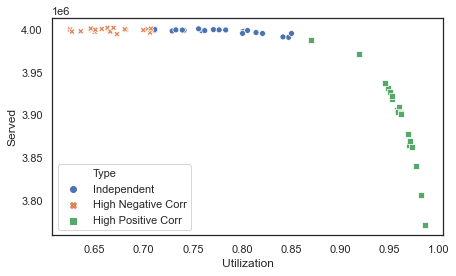

In [60]:
import seaborn as sns
sns.set(rc={"figure.figsize": (7, 4)})
sns.set_style("white")
ax = sns.scatterplot(x="Utilization", y="Served",
                     hue="Type", style="Type", data = W_ALL)

plt.xlabel("Utilization", size=12)
plt.ylabel("Served", size=12)

Text(0, 0.5, 'Correlation')

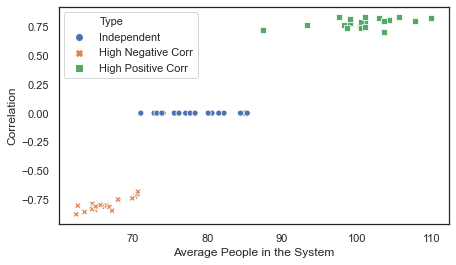

In [41]:
import seaborn as sns
sns.set(rc={"figure.figsize": (7, 4)})
sns.set_style("white")
ax = sns.scatterplot(x="Avg_People", y="Correlation",
                     hue="Type", style="Type", data = W_ALL)


plt.xlabel("Average People in the System", size=12)
plt.ylabel("Correlation", size=12)

As apposed to the V system, the W system performs much optimally if the system exhibits high negative correlation and this is further backed by the set up of the system. Affect the pool sizes with high negative correlation larger split pools High correlated are making the systems behave like a shared V systems where specialized pools are bigger.Lowest performance is seen here. Utilization begins to approach 1 as the system assignment policy has less effect on the system. 